# Welter issue #26
## Text and Analysis for the results section

Michael Gully-Santiago  
Monday, July 5, 2016  

See [Issue26](https://github.com/BrownDwarf/welter/issues/26)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [3]:
import pandas as pd

## Single order results

In [4]:
orders = pd.read_csv('../data/analysis/orders_LkCa4_oneTeff.csv')

In [5]:
orders.tail()

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center,Teff_05p,Teff_50p,Teff_95p,...,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p,Run_num,Instrument,up_limit
84,19256.0,19524.0,K,21,0.189136,92,19390.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run02,IGRINS,False
85,19053.0,19318.0,K,22,0.063695,93,19185.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run02,IGRINS,False
86,18855.0,19117.0,K,23,0.045877,94,18986.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run02,IGRINS,False
87,18661.0,18921.0,K,24,0.042603,95,18791.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run02,IGRINS,False
88,18472.0,18728.0,K,25,0.021191,96,18600.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,run02,IGRINS,False


In [6]:
IG_orders = orders[orders.Instrument == 'IGRINS']
ES_orders = orders[orders.Instrument == 'ESPaDoNs']

In [7]:
len(IG_orders), len(IG_orders.dropna())

(54, 32)

(95.768585968, 3.2545104196182093)

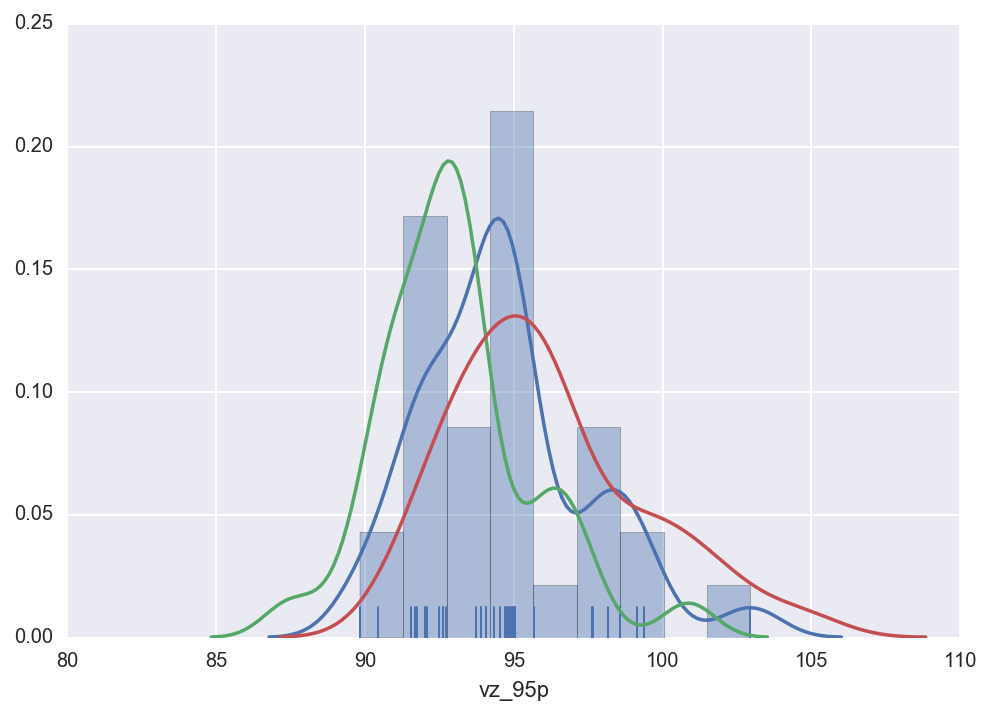

In [8]:
sns.distplot(IG_orders.vz_50p.dropna(), rug=True)
sns.distplot(IG_orders.vz_05p.dropna(), hist=False)
sns.distplot(IG_orders.vz_95p.dropna(), hist=False)
IG_orders.vz_95p.dropna().median(), IG_orders.vz_95p.dropna().std()

(31.254118537900002, 2.4638071000489146)

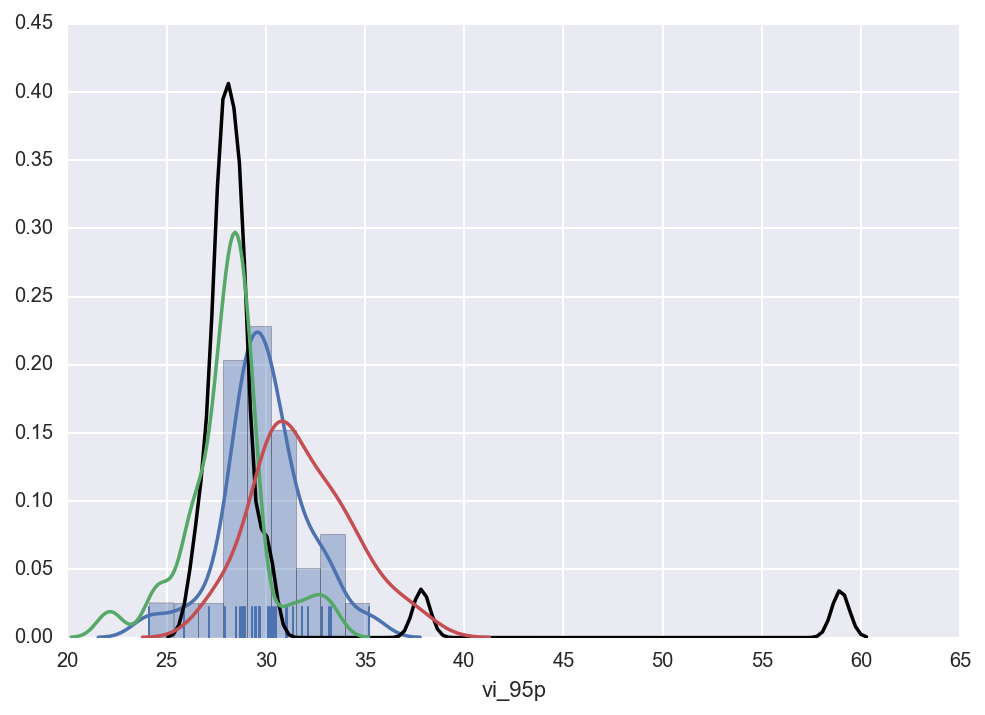

In [9]:
sns.distplot(IG_orders.vi_50p.dropna(), rug=True)
sns.distplot(ES_orders.vi_50p.dropna(), rug=False, hist=False, color='k')
sns.distplot(IG_orders.vi_05p.dropna(), hist=False)
sns.distplot(IG_orders.vi_95p.dropna(), hist=False)
IG_orders.vi_95p.dropna().median(), IG_orders.vi_95p.dropna().std()

(-0.1803974345325, 0.277096225587847)

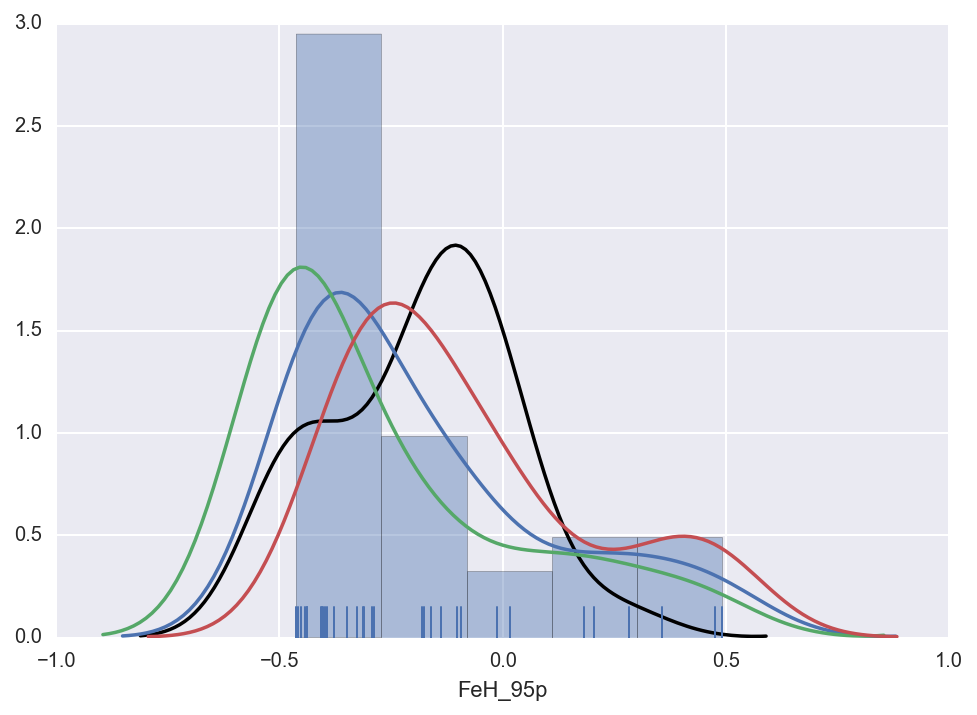

In [10]:
sns.distplot(ES_orders.FeH_50p.dropna(), rug=False, hist=False, color='k')
sns.distplot(IG_orders.FeH_50p.dropna(), rug=True)
sns.distplot(IG_orders.FeH_05p.dropna(), hist=False)
sns.distplot(IG_orders.FeH_95p.dropna(), hist=False)
IG_orders.FeH_95p.dropna().median(), IG_orders.FeH_95p.dropna().std()

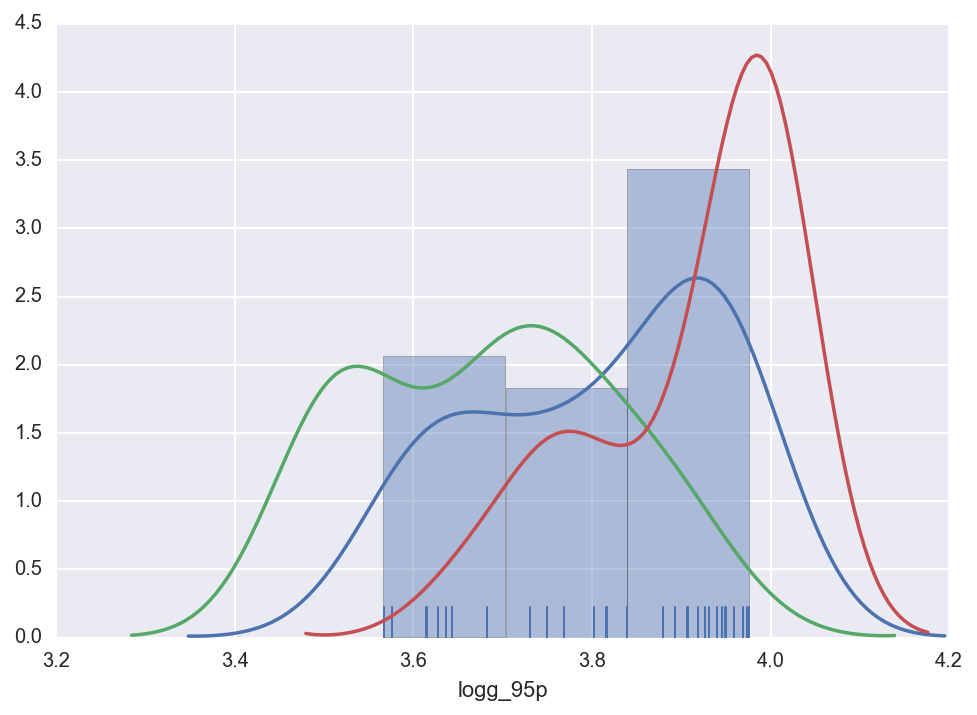

In [11]:
sns.distplot(IG_orders.logg_50p.dropna(), rug=True)
sns.distplot(IG_orders.logg_05p.dropna(), hist=False)
sns.distplot(IG_orders.logg_95p.dropna(), hist=False)
#IG_orders.FeH_95p.dropna().median(), IG_orders.FeH_95p.dropna().std()

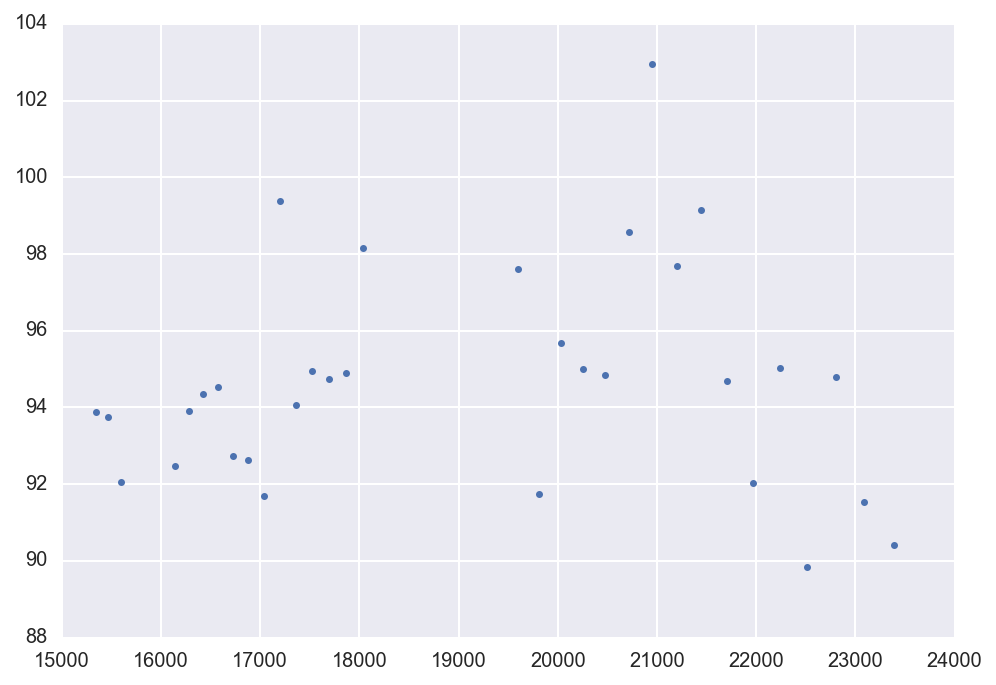

In [12]:
plt.plot(IG_orders.wl_center, IG_orders.vz_50p, '.')

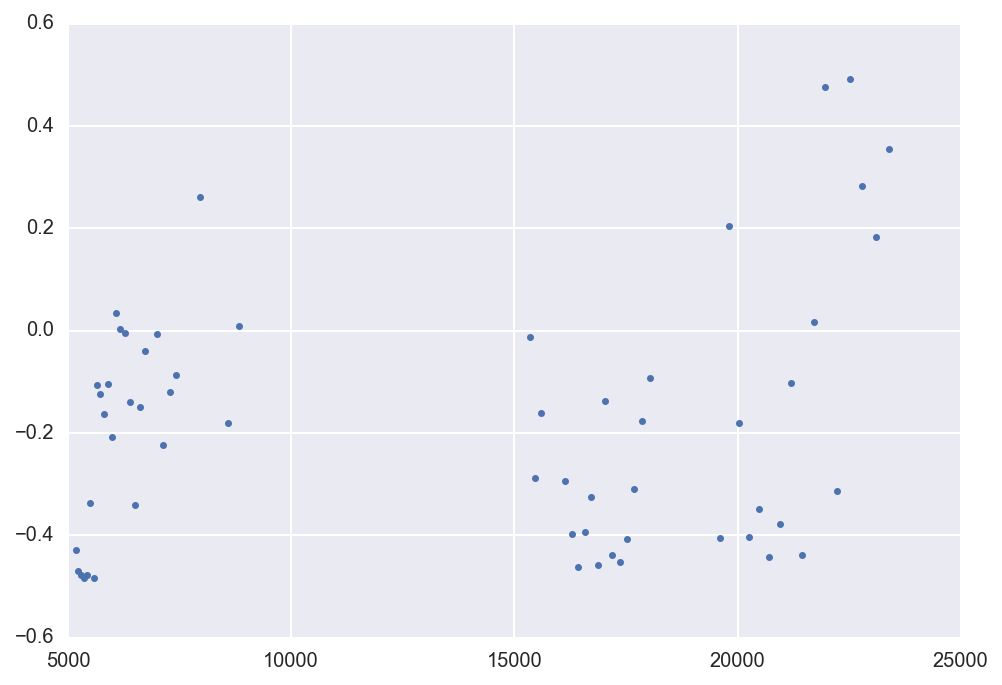

In [13]:
plt.plot(orders.wl_center, orders.FeH_50p, '.')

## Multi order results

In [14]:
mo = pd.read_csv('../data/analysis/IGRINS_mix_emcee_last200.csv')

In [15]:
mo.columns

Index(['wl_start', 'wl_end', 'band', 'number', 'tell_trans', 'm_val',
       'wl_center', 'Teff_05p', 'Teff_50p', 'Teff_95p', 'logg_05p', 'logg_50p',
       'logg_95p', 'FeH_05p', 'FeH_50p', 'FeH_95p', 'vz_05p', 'vz_50p',
       'vz_95p', 'vi_05p', 'vi_50p', 'vi_95p', 'logO_05p', 'logO_50p',
       'logO_95p', 'c1_05p', 'c1_50p', 'c1_95p', 'c2_05p', 'c2_50p', 'c2_95p',
       'c3_05p', 'c3_50p', 'c3_95p', 'SA_05p', 'SA_50p', 'SA_95p', 'LA_05p',
       'LA_50p', 'LA_95p', 'll_05p', 'll_50p', 'll_95p', 'Teff2_05p',
       'Teff2_50p', 'Teff2_95p', 'logO2_05p', 'logO2_50p', 'logO2_95p',
       'ff_05p', 'ff_50p', 'ff_95p', 'inference'],
      dtype='object')

In [16]:
len(mo), len(mo.dropna())

(54, 43)

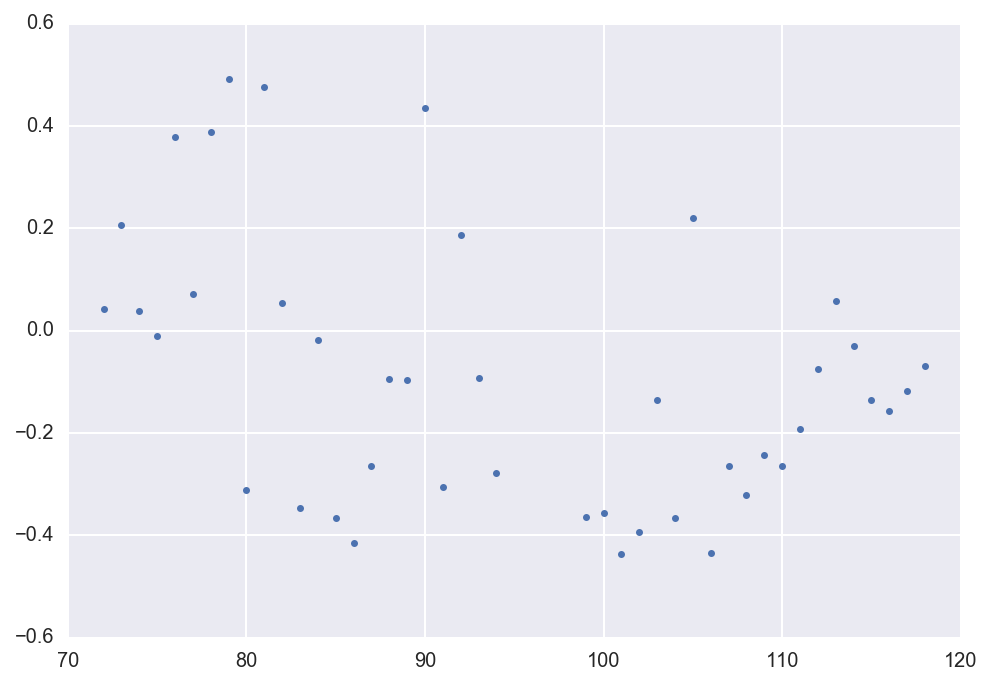

In [41]:
plt.plot(mo.m_val, mo.FeH_50p, '.')

(28.75142416911376, 1.958031640804137)

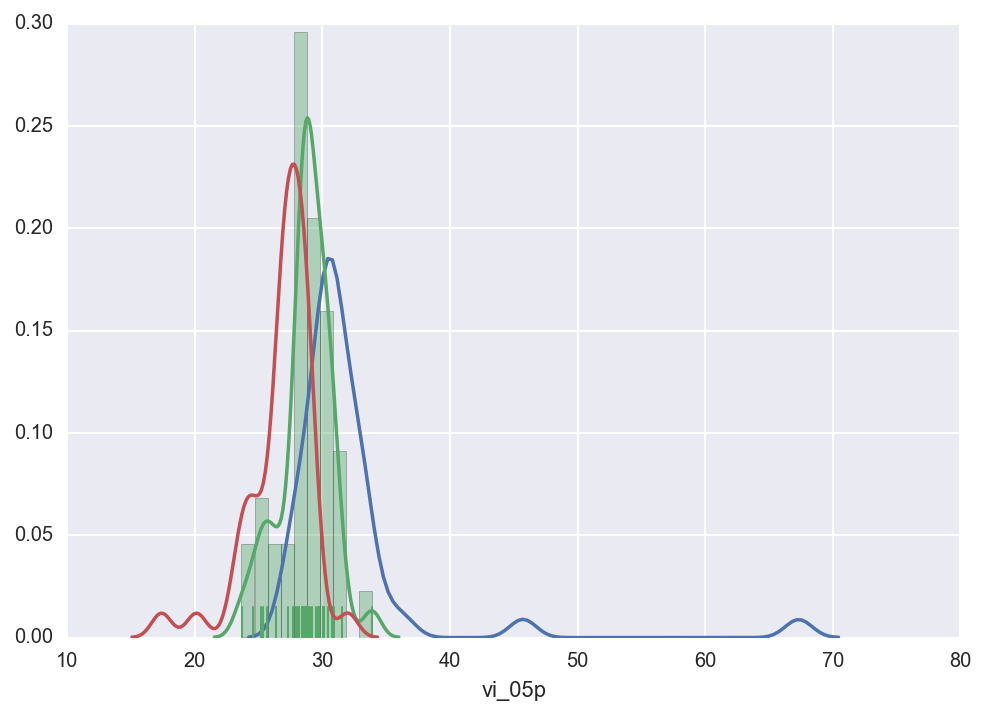

In [32]:
sns.distplot(mo.vi_95p.dropna(), hist=False)
sns.distplot(mo.vi_50p.dropna(), rug=True)
sns.distplot(mo.vi_05p.dropna(), hist=False)
mo.vi_50p.dropna().median(), mo.vi_50p.dropna().std()

In [28]:
bi = mo.vi_95p > 40
mo[bi][['m_val', 'vi_50p']]

,m_val,vi_50p
48,91,28.751424
51,94,23.651124


(12.371144025353582, 2.6293482438014304)

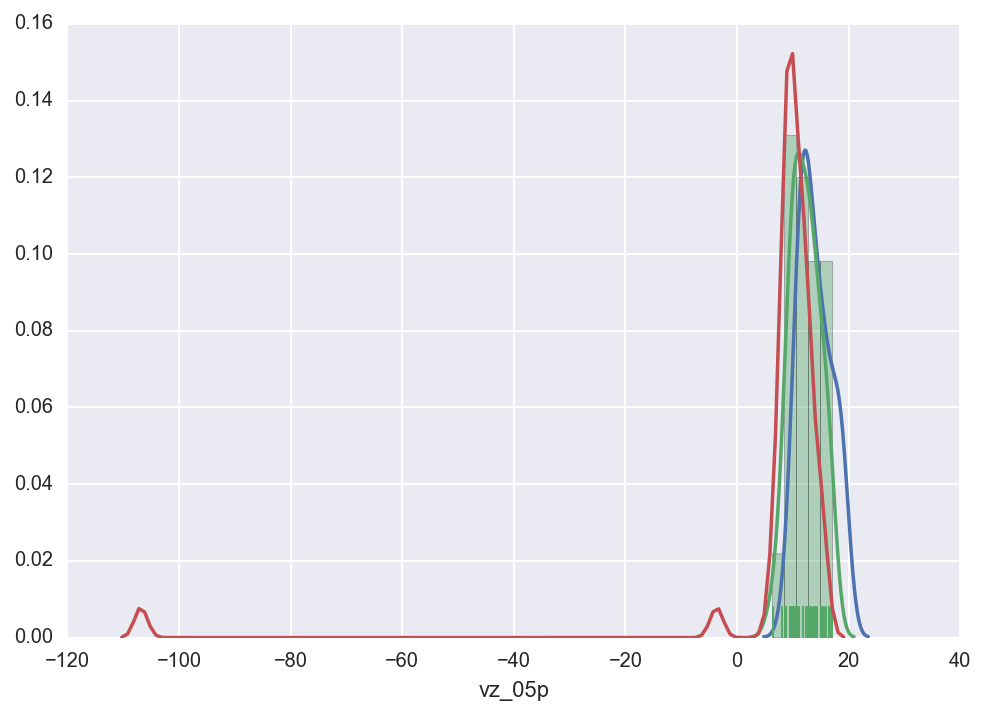

In [36]:
sns.distplot(mo.vz_95p.dropna(), hist=False)
sns.distplot(mo.vz_50p.dropna(), rug=True)
sns.distplot(mo.vz_05p.dropna(), hist=False)
mo.vz_50p.dropna().median(), mo.vz_50p.dropna().std()

In [37]:
bi = mo.vz_05p < 0
mo[bi][['m_val', 'vi_50p', 'vz_50p']]

,m_val,vi_50p,vz_50p
48,91,28.751424,15.106320
51,94,23.651124,6.369079


In [38]:
mo.columns

Index(['wl_start', 'wl_end', 'band', 'number', 'tell_trans', 'm_val',
       'wl_center', 'Teff_05p', 'Teff_50p', 'Teff_95p', 'logg_05p', 'logg_50p',
       'logg_95p', 'FeH_05p', 'FeH_50p', 'FeH_95p', 'vz_05p', 'vz_50p',
       'vz_95p', 'vi_05p', 'vi_50p', 'vi_95p', 'logO_05p', 'logO_50p',
       'logO_95p', 'c1_05p', 'c1_50p', 'c1_95p', 'c2_05p', 'c2_50p', 'c2_95p',
       'c3_05p', 'c3_50p', 'c3_95p', 'SA_05p', 'SA_50p', 'SA_95p', 'LA_05p',
       'LA_50p', 'LA_95p', 'll_05p', 'll_50p', 'll_95p', 'Teff2_05p',
       'Teff2_50p', 'Teff2_95p', 'logO2_05p', 'logO2_50p', 'logO2_95p',
       'ff_05p', 'ff_50p', 'ff_95p', 'inference'],
      dtype='object')

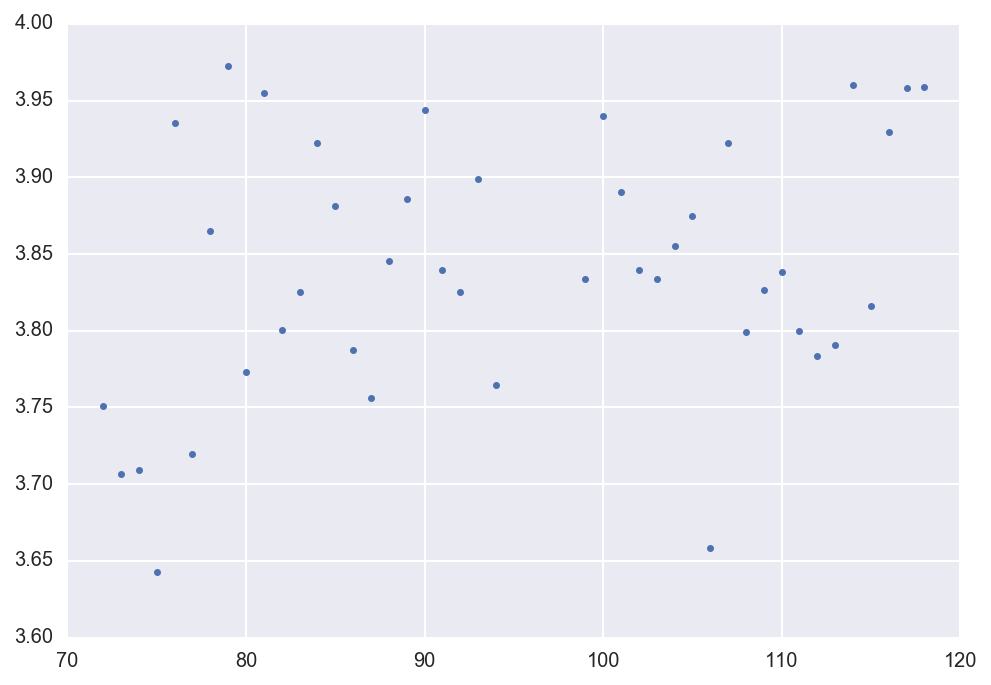

In [58]:
plt.plot(mo.m_val, mo.logg_50p, '.')

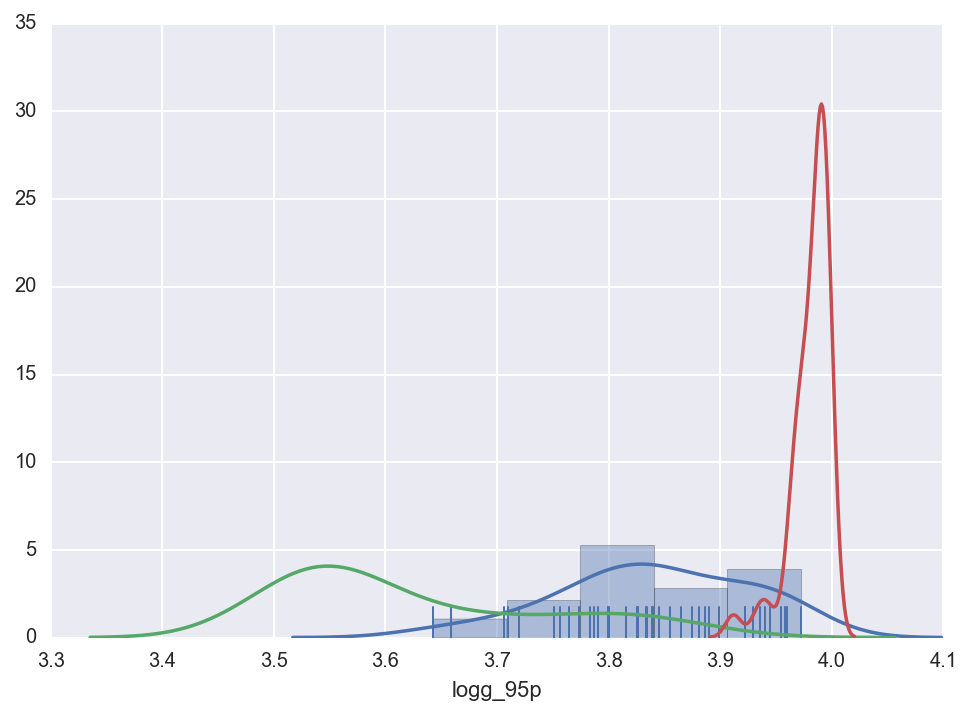

In [46]:
sns.distplot(mo.logg_50p.dropna(), rug=True)
sns.distplot(mo.logg_05p.dropna(), hist=False)
sns.distplot(mo.logg_95p.dropna(), hist=False)

In [48]:
mo.logg_50p.dropna().median(), mo.logg_50p.dropna().std()

(3.838408787854839, 0.0841142632552823)

In [52]:
mo_full = mo
mo = mo.dropna()

In [55]:
weights = 1.0/(mo.logg_95p - mo.logg_05p)
val = (mo.logg_50p*weights).sum()/(weights.sum())


In [56]:
val

3.869246308464142

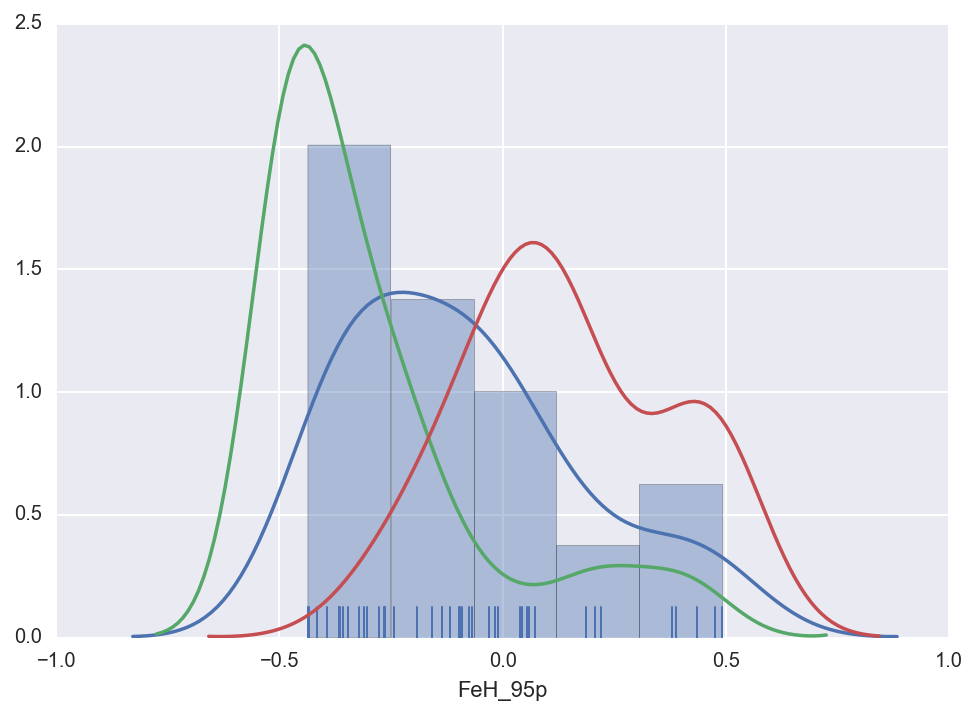

In [81]:
sns.distplot(mo.FeH_50p.dropna(), rug=True)
sns.distplot(mo.FeH_05p.dropna(), hist=False)
sns.distplot(mo.FeH_95p.dropna(), hist=False)

<Container object of 3 artists>

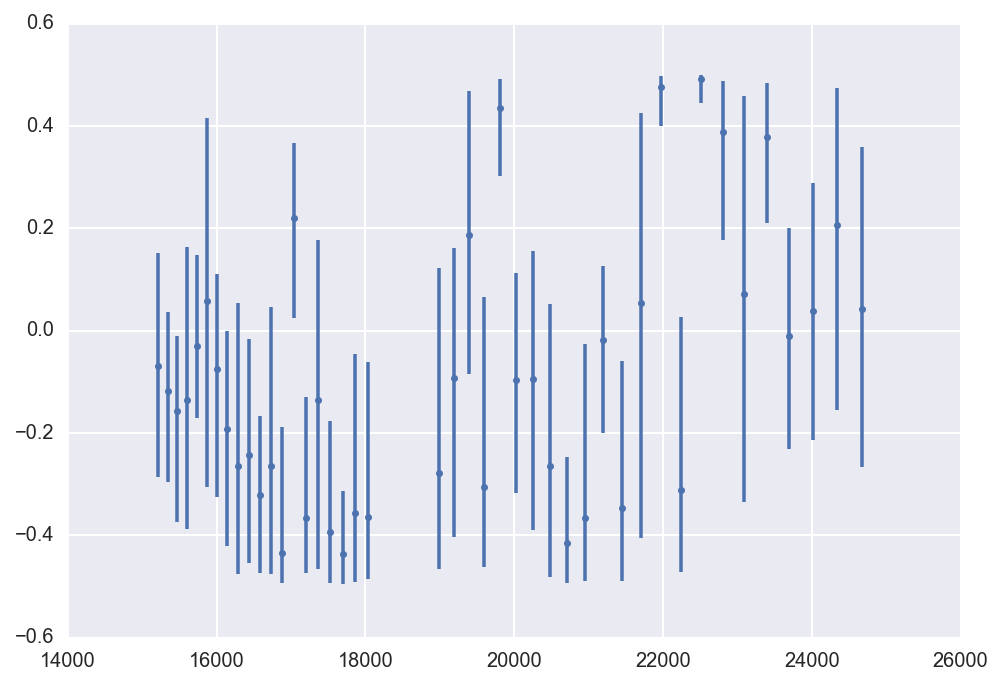

In [66]:
yerr_hi = mo.FeH_95p - mo.FeH_50p
yerr_lo = mo.FeH_50p - mo.FeH_05p
plt.errorbar(mo.wl_center, mo.FeH_50p, yerr=[yerr_lo, yerr_hi], fmt='.')

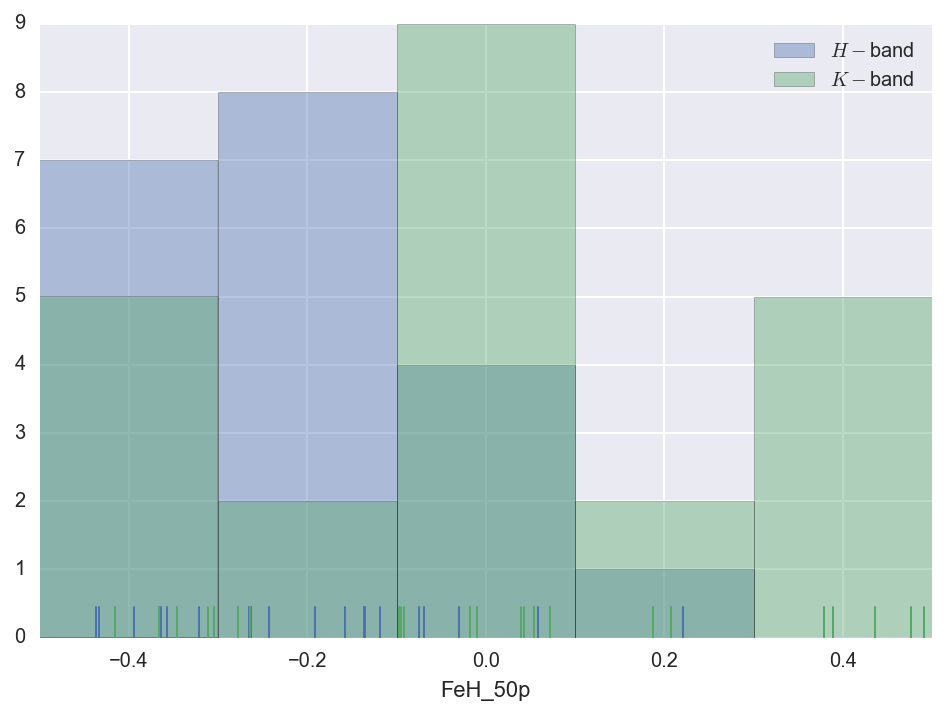

In [80]:
#sns.distplot(mo.FeH_50p, rug=True)
bins = np.arange(-0.5, 0.51, 0.2)
sns.distplot(mo.FeH_50p[mo.band == 'H'], bins, hist=True, kde=False, rug=True, label='$H-$band')
sns.distplot(mo.FeH_50p[mo.band == 'K'], bins, hist=True, kde=False, rug=True, label='$K-$band')
plt.xlim(-0.5, 0.5)
plt.legend(loc='best')

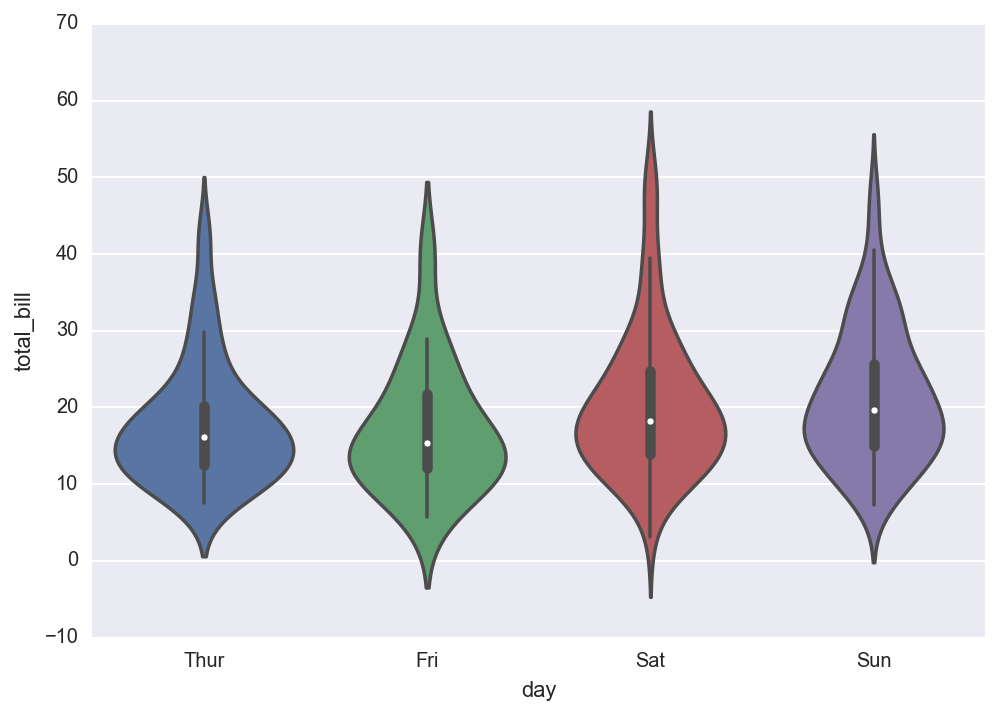

In [83]:
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [84]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
